[Random Forest Algorithm - Random Forest Explained ](https://www.youtube.com/watch?v=eM4uJ6XGnSM)

In [2]:
# Loading scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

# statistical data visualization
import seaborn as sns

# Principal component analysis (PCA).
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA

# Loading pandas
import pandas as pd

# Loading numpy
import numpy as np

## Columns definitions

**start_days** is number of days from the first session

**created_date** is a date of the first session of a contact

**id** is an entity id

In [4]:
# Loading segments

target = "paying" # It is what we try to predict

# a file was generated for 'session_29d'
df = pd.read_csv("/vagrant/ai_random_forest_py/contacts/202402070946/segments.csv", low_memory=False) # returns DataFrame

# del df["created_date"]
# del df["id"]

# 1 if an entity is in a segment at the end of a period
# 0 (zero) if an entity is not in a segment at the end of a period
# 0 (zero) if an entity has never been in a segment

# Viewing the top 5 rows
df.head()

,created_date,id,segm_1,segm_2,segm_3,segm_4,segm_5,segm_6,segm_7,segm_8,...,segm_210,segm_211,segm_212,segm_213,segm_214,segm_215,segm_216,segm_217,segm_218,paying
0,2019-06-18,1,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2019-06-18,2,0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2019-06-18,3,0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2019-06-18,4,0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2019-06-18,5,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
del df["created_date"]
del df["id"]

df.head()

,segm_1,segm_2,segm_3,segm_4,segm_5,segm_6,segm_7,segm_8,segm_9,segm_10,...,segm_210,segm_211,segm_212,segm_213,segm_214,segm_215,segm_216,segm_217,segm_218,paying
0,0,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:

# Replacing true to 1  false to 0
# It has been replaced already
# df['paying'] = df['paying].replace({"in": 1, "out": 0})



In [7]:
# The csv file was generated following this rule
# Filtering where start_days >= max_session_days
# max_session_days = 30
# df = df[df['start_days'] >= max_session_days] 


In [8]:
# Filtering paying entities that are paying at the beginning
# The csv file was generated following this rule


We are exploring data and one of the chalanges is how good your model is? Did your model work?

and to do this we need to split a data to two different parts. Their are called the training and the testing

In [10]:
# print(f'Count of rows where paying = 1 (true)): {df[df['paying'] == 1].shape[0]}')
print('Paying entities', df[df['paying'] == 1].shape[0])
print('Not Paying entities', df[df['paying'] == 0].shape[0])

Paying entities 36
Not Paying entities 2060


In [11]:
# Create a list of the feature column's names

# The last column is not taken into account (paying)
features = df.columns[:(df.shape[1] - 1)]


# View features
print(f'Features: {features}')

df.head()

Features: Index(['segm_1', 'segm_2', 'segm_3', 'segm_4', 'segm_5', 'segm_6', 'segm_7',
       'segm_8', 'segm_9', 'segm_10',
       ...
       'segm_209', 'segm_210', 'segm_211', 'segm_212', 'segm_213', 'segm_214',
       'segm_215', 'segm_216', 'segm_217', 'segm_218'],
      dtype='object', length=218)


,segm_1,segm_2,segm_3,segm_4,segm_5,segm_6,segm_7,segm_8,segm_9,segm_10,...,segm_210,segm_211,segm_212,segm_213,segm_214,segm_215,segm_216,segm_217,segm_218,paying
0,0,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


There are a couple of approaches to create Test and Train data

In [12]:
# Creating Test and Train Data
# df['is_train'] = np.random.uniform(0, 1, len(df)) <= 0.75

# df1 = df[df['paying'] == 1]
# df2 = df[df['paying'] == 0]

# df1['is_train'] = np.random.uniform(0, 1, len(df1)) <= 0.75
# df2['is_train'] = np.random.uniform(0, 1, len(df2)) <= 0.75

# df = pd.concat([df1, df2])

# View the top 5 rows
# df.head()

In [13]:
# Creating Test and Train Data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df, df['paying'], test_size=0.3, random_state = 2020, stratify = df['paying'])


In [14]:

print('data: ', df.shape[0])

print('Traning data')
print('Paying True: ', x_train[x_train['paying'] == True].shape[0])
print('Paying False: ', x_train[x_train['paying'] == False].shape[0])

print('')

print('Testing data')
print('Paying True: ', x_test[x_test['paying'] == True].shape[0])
print('Paying False', x_test[x_test['paying'] == False].shape[0])

data:  2096
Traning data
Paying True:  25
Paying False:  1442

Testing data
Paying True:  11
Paying False 618


In [15]:
x_train = x_train[features]
x_test = x_test[features]

x_train

,segm_1,segm_2,segm_3,segm_4,segm_5,segm_6,segm_7,segm_8,segm_9,segm_10,...,segm_209,segm_210,segm_211,segm_212,segm_213,segm_214,segm_215,segm_216,segm_217,segm_218
1165,0,0,0,1,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1953,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
862,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
106,0,0,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1925,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2041,0,0,0,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
141,0,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1341,0,0,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# # Creating two dataframes with test rows and training rows
# x_train = df[df['is_train'] == True]
# x_test = df[df['is_train'] == False]

# # Show the number of observasions for the test and training dataframes
# print('Number of observations in the training data:', len(train))
# print('Number of observations in the test data:', len(test))

# # print(f'Count of rows where paying = 1 (true)): {df[df['paying'] == 1].shape[0]}')
# print('Traning data')
# print('Paying True: ', train[train['paying'] == True].shape[0])
# print('Paying False: ', train[train['paying'] == False].shape[0])

# print('Testing data')
# print('Paying True: ', test[test['paying'] == True].shape[0])
# print('Paying False', test[test['paying'] == False].shape[0])

In [17]:
# Convertin each target into digits
# https://pandas.pydata.org/docs/reference/api/pandas.factorize.html
# y_train = train[target].to_numpy() 
# y_train = train[target] # There are digits already 

# Viewing target
y_train

1165    0
1953    0
862     0
106     0
1925    0
       ..
1867    0
2041    0
141     0
1341    0
425     0
Name: paying, Length: 1467, dtype: int64

In [18]:
# Creating a random forest Classifier
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
clf = RandomForestClassifier(n_jobs = 2, random_state = 0)

# Training the classifier
# fit Build a forest of trees from the training set (X, y).
clf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=2, random_state=0)

In [19]:
features

Index(['segm_1', 'segm_2', 'segm_3', 'segm_4', 'segm_5', 'segm_6', 'segm_7',
       'segm_8', 'segm_9', 'segm_10',
       ...
       'segm_209', 'segm_210', 'segm_211', 'segm_212', 'segm_213', 'segm_214',
       'segm_215', 'segm_216', 'segm_217', 'segm_218'],
      dtype='object', length=218)

In [20]:
x_test

,segm_1,segm_2,segm_3,segm_4,segm_5,segm_6,segm_7,segm_8,segm_9,segm_10,...,segm_209,segm_210,segm_211,segm_212,segm_213,segm_214,segm_215,segm_216,segm_217,segm_218
104,0,0,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
410,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
594,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1697,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
462,0,0,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
499,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
431,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### [score](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.score)

Return the coefficient of determination of the prediction.

The coefficient of determination R^2 is defined as **(1 - u/v)**, 
where **u** is the residual sum of squares ((y_true - y_pred)** 2).sum() and 
**v** is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a score of 0.0.

In [21]:
display(clf.score(x_train, y_train))

0.9993183367416496

### [Gini importance](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)

The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.



In [22]:
features

Index(['segm_1', 'segm_2', 'segm_3', 'segm_4', 'segm_5', 'segm_6', 'segm_7',
       'segm_8', 'segm_9', 'segm_10',
       ...
       'segm_209', 'segm_210', 'segm_211', 'segm_212', 'segm_213', 'segm_214',
       'segm_215', 'segm_216', 'segm_217', 'segm_218'],
      dtype='object', length=218)

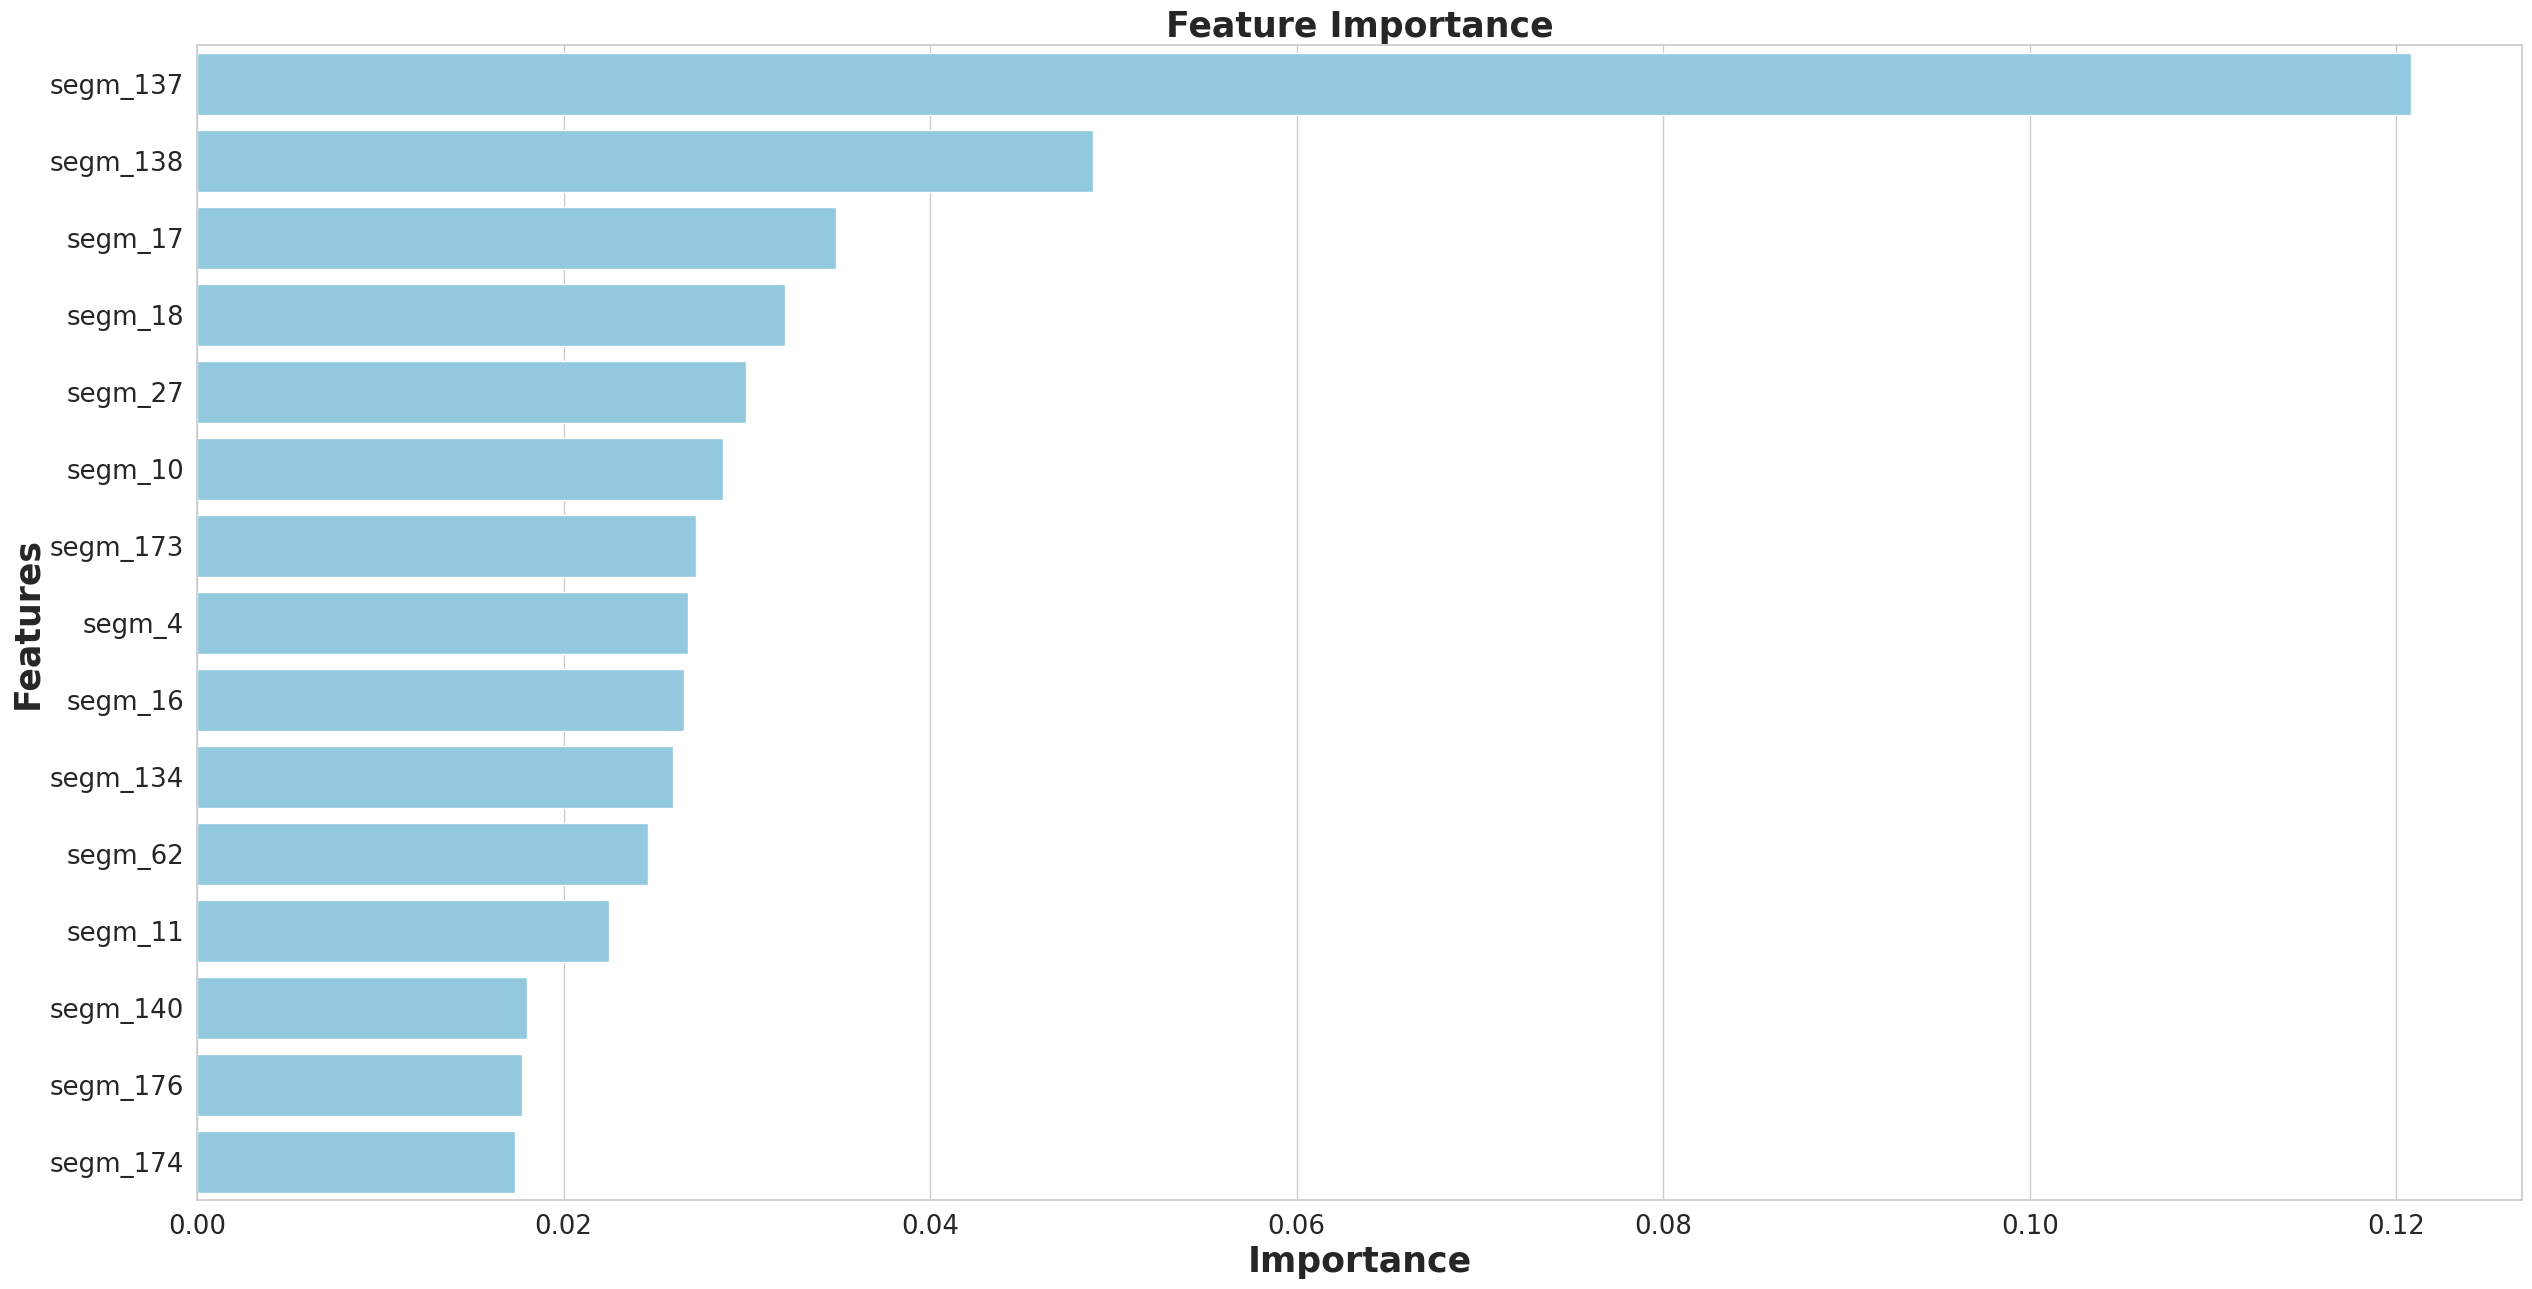

None

In [23]:
# clf.feature_importances_

feats = {}
for feature, importance in zip(features, clf.feature_importances_):
    feats[feature] = importance


importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)

fig, ax = plt.subplots()
fig.set_size_inches(30,15)

sns.barplot(x=importances['Gini-Importance'][0:15], y=importances['Features'][0:15], data=importances, color='skyblue')

plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')

display(plt.show())



##### Feature Importance

In [24]:
display(importances)

,Features,Gini-Importance
0,segm_137,0.120824
1,segm_138,0.048865
2,segm_17,0.034837
3,segm_18,0.032098
4,segm_27,0.029929
...,...,...
213,segm_102,0.000000
214,segm_103,0.000000
215,segm_104,0.000000
216,segm_105,0.000000


#### [Feature importance based on feature permutation](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance)

In [25]:
# x_test = test[features]
# y_test = test[target]

print(x_test.shape)

(629, 218)


In [26]:
print(y_test.shape)

(629,)


In [27]:
print(x_train.shape)

(1467, 218)


In [28]:
print(y_train.shape)

(1467,)


In [29]:
print(len(features))

218


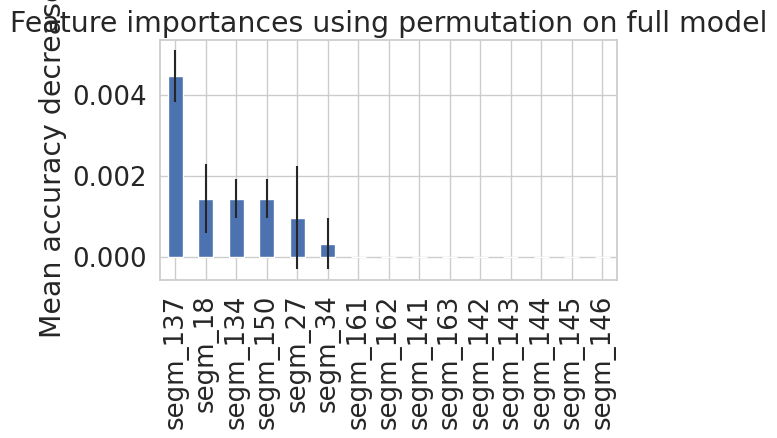

In [30]:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#feature-importance-based-on-feature-permutation

from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance

# result = permutation_importance(clf, x_train, y_train, n_repeats=10, random_state=0)
result = permutation_importance(clf, x_test, y_test, n_repeats=10, random_state=0)

# result.importances_mean

# result.importances_std

forest_importances = pd.Series(result.importances_mean, index=features).sort_values(ascending=False)[:15]

forest_importances_std = pd.Series(result.importances_std, index=features).sort_values(ascending=False)

# forest_importances
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=forest_importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

### [Principal component analysis (PCA)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

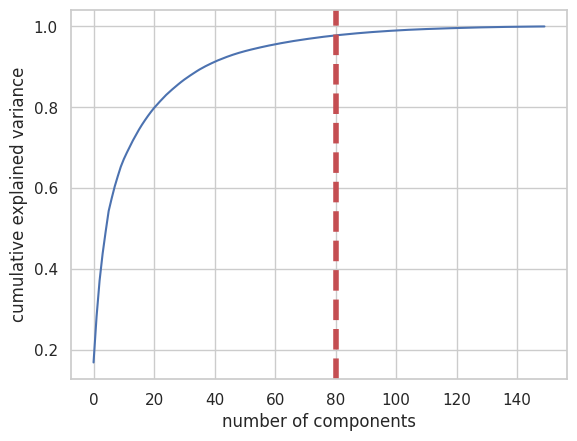

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.168796,0.168796
1,0.282321,0.113525
2,0.371438,0.089117
3,0.437782,0.066344
4,0.492236,0.054454
...,...,...
75,0.973057,0.000964
76,0.973999,0.000943
77,0.974898,0.000898
78,0.975793,0.000895


In [32]:
pca_test = PCA(n_components=150)

pca_test.fit(x_train)

sns.set(style='whitegrid')

plt.plot(np.cumsum(pca_test.explained_variance_ratio_))

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=80, ymin=0, ymax=1)

display(plt.show())


evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr

display(pca_df.head(80))

80 features can explain more than 97% data dispersion

In [33]:
pca = PCA(n_components=80)
pca.fit(x_train)

x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

pca_dims = []
for x in range(0, len(pca_df)):
    pca_dims.append('PCA Component {}'.format(x))

pca_test_df = pd.DataFrame(pca_test.components_, columns=features, index=pca_dims)
pca_test_df.head(80).T

,PCA Component 0,PCA Component 1,PCA Component 2,PCA Component 3,PCA Component 4,PCA Component 5,PCA Component 6,PCA Component 7,PCA Component 8,PCA Component 9,...,PCA Component 70,PCA Component 71,PCA Component 72,PCA Component 73,PCA Component 74,PCA Component 75,PCA Component 76,PCA Component 77,PCA Component 78,PCA Component 79
segm_1,-0.001915,-0.000479,-0.001197,-0.002612,0.001701,0.000644,-0.000305,-0.000684,0.000475,-0.004378,...,0.002898,0.014063,0.002218,0.015897,-0.027051,-0.002909,-0.005967,-0.021143,-0.007411,-0.009181
segm_2,0.026621,-0.063857,0.039782,-0.050708,-0.013434,-0.026012,-0.032385,0.130076,0.165120,0.061767,...,-0.026227,-0.000124,-0.042305,0.012325,-0.008869,-0.009317,0.030510,0.013193,0.043581,0.055039
segm_3,0.001166,0.019335,-0.004239,0.007448,-0.005367,0.000300,-0.009271,0.009629,0.010547,0.002434,...,0.254283,-0.126706,-0.097362,0.635557,0.013322,-0.113672,-0.309993,0.343904,0.126632,0.160069
segm_4,0.146346,0.231458,-0.176025,-0.114604,-0.091298,0.014284,0.049692,-0.072042,-0.135486,-0.247260,...,0.017630,-0.017487,0.002866,0.022344,0.009438,0.000789,-0.009773,0.004937,0.004308,0.024190
segm_5,0.124978,0.183187,-0.134897,-0.107574,-0.039367,0.007826,0.104241,-0.108169,-0.179609,-0.076416,...,-0.012240,-0.025351,0.007306,-0.026111,-0.005218,0.019490,0.025690,-0.007995,0.002431,-0.000877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
segm_214,-0.000301,-0.000058,-0.001308,-0.001159,0.000334,-0.000322,-0.000385,-0.000716,-0.000482,0.003015,...,-0.019181,-0.025868,-0.026279,-0.018992,-0.013554,0.037396,0.006912,0.029113,-0.013100,0.024066
segm_215,-0.000301,-0.000058,-0.001308,-0.001159,0.000334,-0.000322,-0.000385,-0.000716,-0.000482,0.003015,...,-0.019181,-0.025868,-0.026279,-0.018992,-0.013554,0.037396,0.006912,0.029113,-0.013100,0.024066
segm_216,0.000536,0.000141,-0.000596,-0.000165,0.002500,-0.000132,0.000768,-0.000419,0.005805,0.001309,...,0.036702,-0.020754,0.048664,-0.032327,0.054926,-0.004542,0.007235,-0.017719,0.004072,0.018483
segm_217,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,...,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000


In [34]:
print(f'x_train: number of rows is {x_train.shape[0]} - number of columns (features) is {x_train.shape[0]}')
print(f'x_train_pca: number of rows is {x_train_pca.shape[0]} - number of columns (features) is {x_train_pca.shape[1]}')

x_train: number of rows is 1467 - number of columns (features) is 1467
x_train_pca: number of rows is 1467 - number of columns (features) is 80


**RF + PCA**

In [35]:
clf_pca = RandomForestClassifier()

clf_pca.fit(x_train_pca, y_train)

display(clf_pca.score(x_train_pca, y_train))

0.9993183367416496

The score is the same after reducing the number of features

### Hyperparameter Tuning

[Hyperparameter Tuning the Random Forest in Python](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)


At first step we use RandomizedSearchCV to find optimal range of values

At the second step we use GridSearchCV to choose the best value for each parameter

We use RandomizedSearchCV to reduce number of values to consider using  GridSearchCV

GridSearchCV is more precise but it uses more computing resources


[RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

[GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [36]:
# Random Forest tuning | RandomizedSearchCV https://www.kaggle.com/code/funxexcel/p3-random-forest-tuning-randomizedsearchcv

#### [With RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

**n_estimators**      - The number of trees in the forest.

**max_features**      - The number of features to consider when looking for the best split

**max_depth**         - The maximum depth of the tree.

**min_samples_split** - The minimum number of samples required to split an internal node

**min_samples_leaf**  - The minimum number of samples required to be at a leaf node

**bootstrap**         - Whether bootstrap samples are used when building trees

In [37]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

max_features = ['log2', 'sqrt']

max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]

min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]

min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]

bootstrap = [True, False]

param_dist = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

clf_model = RandomForestClassifier()

rs_cv = RandomizedSearchCV(clf_model, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)


rs_cv.fit(x_train_pca, y_train)
rs_cv.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 300,
 'min_samples_split': 18,
 'min_samples_leaf': 39,
 'max_features': 'log2',
 'max_depth': 2,
 'bootstrap': True}

In [38]:
rs_df = pd.DataFrame(rs_cv.cv_results_).sort_values('rank_test_score').reset_index(drop=True)

rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)

rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,mean_test_score,rank_test_score
0,300,18,39,log2,2,True,0.982958,1
1,100,34,28,sqrt,2,True,0.982958,1
2,700,2,2,log2,11,True,0.982958,1
3,200,12,2,log2,4,True,0.982958,1
4,600,2,34,sqrt,12,True,0.982958,1
5,100,2,18,sqrt,15,False,0.982958,1
6,300,28,39,log2,14,True,0.982958,1
7,700,18,7,sqrt,7,False,0.982958,1
8,700,23,7,log2,15,False,0.982958,1
9,500,12,18,sqrt,13,False,0.982958,1


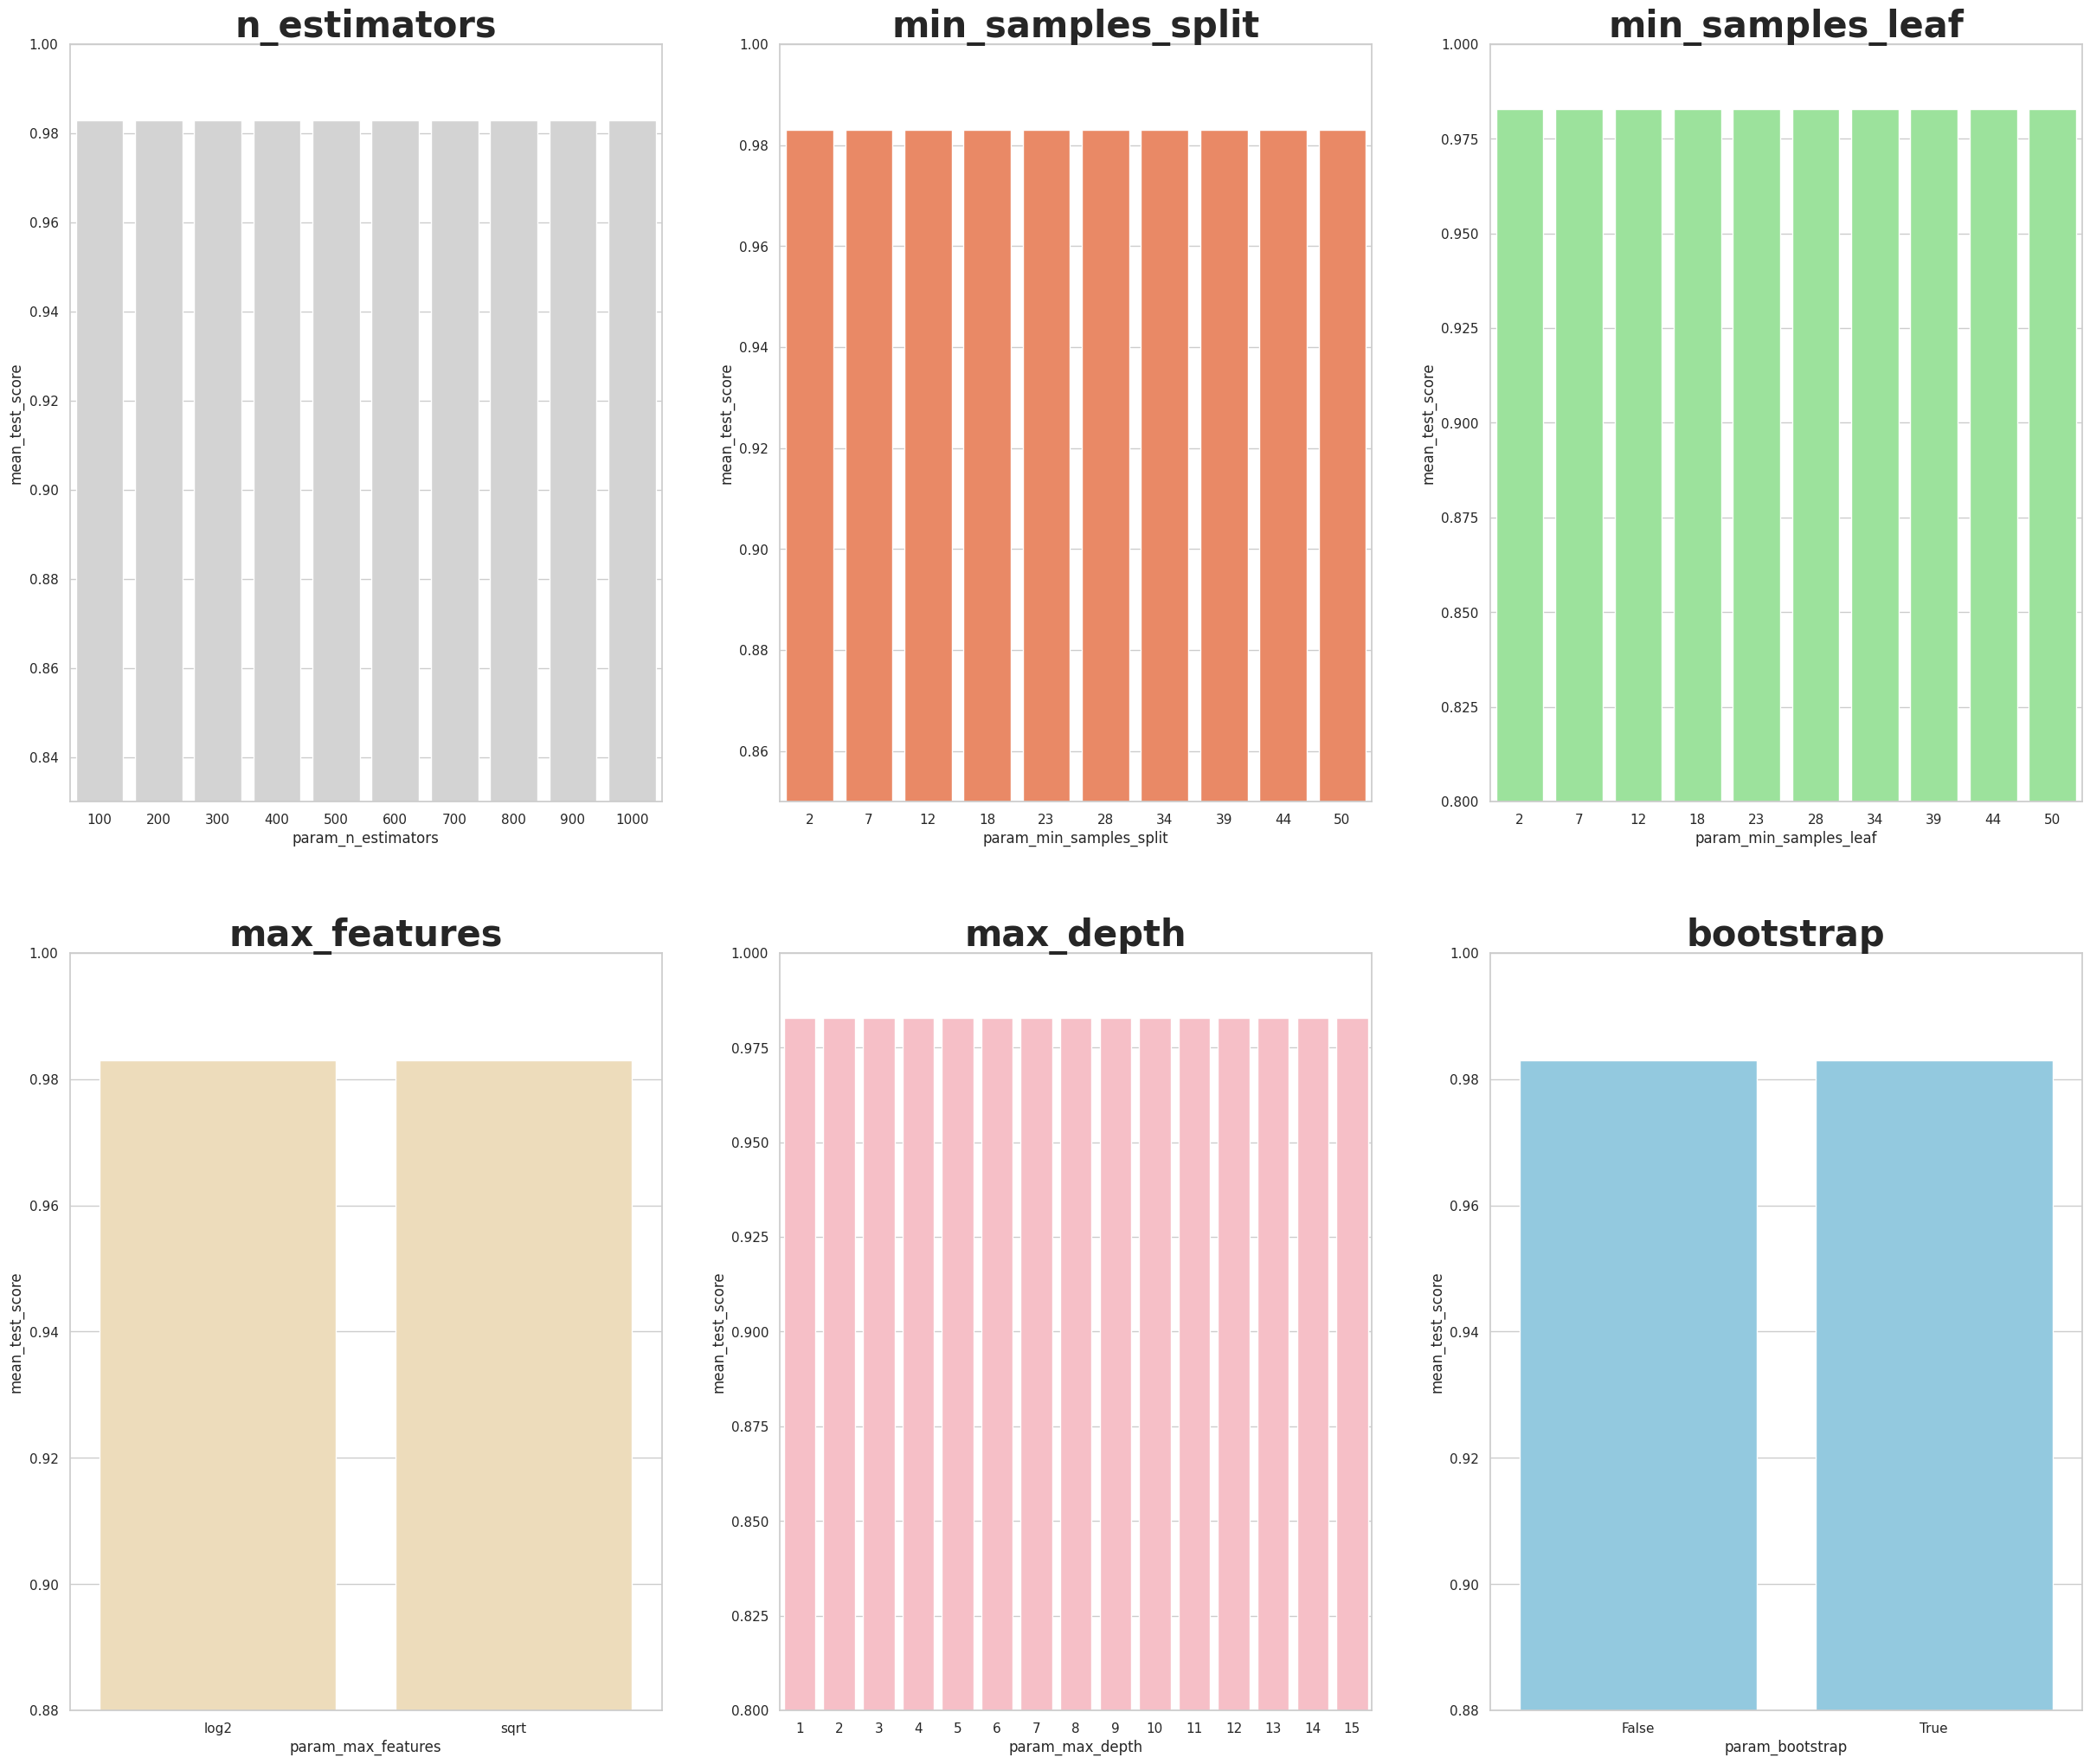

In [39]:
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)

sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.83,1])
axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')

sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.85,1])
axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')

sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.80,1])
axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')

sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.88,1])
axs[1,0].set_title(label = 'max_features', size=30, weight='bold')

sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.80,1])
axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')

sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.88,1])
axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')

plt.show()

In [40]:
# We can see how each hyperparameter influences to a model

# Let's select values that show best results
# It is not the best example
# Let's select the following values

n_estimators = [600, 700]

max_features = ['sqrt']

max_depth = [15, 14]

min_samples_split = [23, 28]

min_samples_leaf = [2, 7]

bootstrap = [False] 

#### GridSearchCV

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

clf_model = RandomForestClassifier()

gs = GridSearchCV(clf_model, param_grid, cv = 3, verbose = 1, n_jobs=-1)

gs.fit(x_train_pca, y_train)

clf_2 = gs.best_estimator_

gs.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


{'bootstrap': False,
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 23,
 'n_estimators': 600}

### Assessing the quality of models using test data

In [42]:
y_pred = clf.predict(x_test)

y_pred_pca = clf_pca.predict(x_test_pca)

y_pred_gs = gs.best_estimator_.predict(x_test_pca)

[**recall_score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)

Compute the recall.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The best value is 1 and the worst value is 0.

In [43]:
from sklearn.metrics import recall_score

display(pd.crosstab(y_test.astype(bool), y_pred.astype(bool), rownames = ['Actual Paying'], colnames = ['Predicted Paying']))

display('Baseline Random Forest recall score', recall_score(y_test, y_pred))


display(pd.crosstab(y_test.astype(bool), y_pred_pca.astype(bool), rownames = ['Actual Paying'], colnames = ['Predicted Paying']))

display('Baseline Random Forest recall score', recall_score(y_test, y_pred_pca))

display(pd.crosstab(y_test.astype(bool), y_pred_gs.astype(bool), rownames = ['Actual Paying'], colnames = ['Predicted Paying']))

display('Baseline Random Forest recall score', recall_score(y_test, y_pred_gs))

Predicted Paying,False,True
Actual Paying,,
False,615,3
True,3,8


'Baseline Random Forest recall score'

0.7272727272727273

Predicted Paying,False,True
Actual Paying,,
False,616,2
True,7,4


'Baseline Random Forest recall score'

0.36363636363636365

Predicted Paying,False
Actual Paying,
False,618
True,11


'Baseline Random Forest recall score'

0.0

**R^2 (coefficient of determination) regression score function.**


[r2 score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)


Best possible score is 1.0 and **it can be negative (because the model can be arbitrarily worse)**. In the general case when the true y is non-constant, a constant model that always predicts the average y disregarding the input features would get a 
 score of 0.0.

In [45]:
from sklearn.metrics import r2_score

# sklearn.metrics.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)
print('R^2: ', r2_score(y_test, y_pred))

print('R^2 PCA: ', r2_score(y_test, y_pred_pca))

print('R^2 PCA-GridSearchCV: ', r2_score(y_test, y_pred_gs))



R^2:  0.4448367166813768
R^2 PCA:  0.16725507502206516
R^2 PCA-GridSearchCV:  -0.01779935275080935


PCA is not helpful in our case

Let's develop a script without PCA

[ai_segments_without_pca.ipynb](https://github.com/AlexeyAlexey/ai_random_forest_py/blob/main/ai_segments_without_pca.ipynb)